In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import os

import cv2

from glob import glob
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection
from scipy.stats import linregress, ttest_ind
from scipy.spatial.distance import cdist


from utils import geometry

In [2]:
olddata=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\CellReports Traces/pooled_population_data_control_35pc.csv')
olddata=olddata[olddata.Time==0]

In [33]:
olddata

,Unnamed: 0,Area,Circularity_j,Circularity_p,Experiment,NumSides,Orientation_j,Orientation_p,Perimeter,Time,pArea,pCircularity_p,pOrientation_p,pPerimeter
923,923,0.757163,0.295737,0.433680,MAX_20151002_control_35pcstretch,6,2.152998,4.463097,125.882251,0,0.735826,0.429346,4.909905,117.179068
924,924,0.487627,0.718569,0.936522,MAX_20151002_control_35pcstretch,4,151.175924,62.935263,95.840620,0,0.359963,0.836948,129.189813,86.034652
925,925,1.149815,0.169481,0.308105,MAX_20151002_control_35pcstretch,7,2.144992,2.103681,166.163096,0,1.112130,0.280042,3.129398,149.611404
926,926,1.063195,0.479265,0.627393,MAX_20151002_control_35pcstretch,6,99.137178,98.145987,147.040678,0,1.059130,0.678030,105.137884,134.240041
927,927,0.820480,0.223070,0.487690,MAX_20151002_control_35pcstretch,5,145.089835,150.179161,124.225397,0,0.624083,0.357131,147.966491,113.076946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906,5906,1.358636,0.264711,0.389299,27March13_control_35pcstretch,6,9.687870,11.010932,127.740115,0,1.272381,0.348086,11.464973,120.256411
5907,5907,0.990792,0.538889,0.834848,27March13_control_35pcstretch,5,20.319775,12.535412,105.012193,0,0.867599,0.643296,23.357807,97.250595
5908,5908,1.195310,0.266206,0.361098,27March13_control_35pcstretch,6,20.209022,15.493922,128.083261,0,1.221602,0.382357,17.302196,118.992562
5909,5909,1.197478,0.179567,0.240692,27March13_control_35pcstretch,6,20.726451,18.805587,137.885822,0,1.144708,0.268947,20.195284,119.164502


In [3]:
new_files=glob('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\*\\2023*8p6*\\*\\*\\*_cell_data_geometry.csv')

In [165]:
new_files[0].split('\\')[6]

'20230803_2_IP_GFPCAAX-CHeHis_uf_8p6.lif'

In [4]:
newdatmeans=[]
newdata=pd.read_csv(new_files[0])
newdata['Exp']=new_files[0].split('\\')[6]
newdatmeans.append(np.mean(newdata.circularity))
for f in new_files[1:]:
    dat=pd.read_csv(f)
    dat['Exp']=f.split('\\')[6]
    newdatmeans.append(np.mean(dat.circularity))
   # sns.histplot(data=dat, x='circularity', element="step")
    #plt.show()
    newdata=pd.concat([newdata, dat])

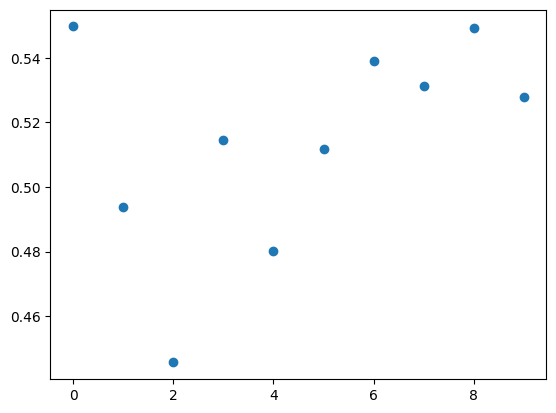

In [88]:
plt.scatter(np.linspace(0, len(newdatmeans)-1, len(newdatmeans)), newdatmeans)

In [13]:
emma_files

['C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20170628_1_EJ_GFPTub-CheHis_uf_8p6_MP_fr1\\2023-05-25_16-27-14\\Data\\20170628_1_fr1_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20190606_1_EJ_GFPTub-CheHis_uf_8p6_MP_fr1\\2023-05-25_16-58-30\\Data\\20190606_1_fr1_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20190613_1_EJ_GFPTub-CheHis_uf_8p6_MP_fr1\\2023-05-25_15-57-19\\Data\\20190613_1_fr1_cell_data_geometry.csv']

In [14]:
med_files=glob('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\*\\*8p6*\\*\\*\\*_cell_data_geometry.csv')[0:3]
med_files

['C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\20170628_1_GG_GFPTub-CheHis_uf_8p6.lif\\20170628_1_EJ_GFPTub-CheHis_uf_8p6_MP_cp_outlines\\2023-10-29_13-56-25\\Data\\20170628_1_cp_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\20190606_1_GG_GFPTub-CheHis_uf_8p6.lif\\20190606_1_EJ_GFPTub-CheHis_uf_8p6_MP_cp_outlines\\2023-10-29_14-32-02\\Data\\20190606_1_cp_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\20190613_1_GG_GFPTub-CheHis_uf_8p6.lif\\20190613_1_EJ_GFPTub-CheHis_uf_8p6_MP_cp_outlines\\2023-10-29_14-43-46\\Data\\20190613_1_cp_cell_data_geometry.csv']

In [15]:
meddata=pd.read_csv(med_files[0])
for f in med_files[1:]:
    dat=pd.read_csv(f)
   # sns.histplot(data=dat, x='circularity', element="step")
    #plt.show()
    meddata=pd.concat([meddata, dat])

In [7]:
emma_files=glob('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\*EJ*_uf_8p6_MP_fr1\\*\\Data\\*_cell_data_geometry.csv')
emmadata=pd.read_csv(emma_files[0])
for f in emma_files[1:]:
    dat=pd.read_csv(f)
   # sns.histplot(data=dat, x='circularity', element="step")
    #plt.show()
    emmadata=pd.concat([emmadata, dat])

In [9]:
olddata.groupby('Experiment').describe().Circularity_j.to_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\circularity_summary_stats_cellreports.csv')

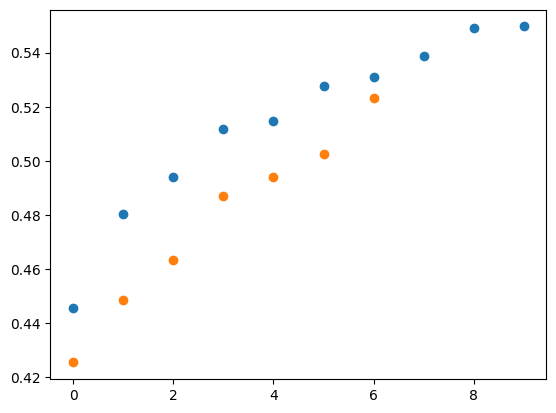

In [10]:
olddatmeans=np.array(olddata.groupby('Experiment').mean().Circularity_j)

plt.scatter(np.linspace(0, len(newdatmeans)-1, len(newdatmeans)), sorted(newdatmeans))
plt.scatter(np.linspace(0, len(olddatmeans)-1, len(olddatmeans)), sorted(olddatmeans))

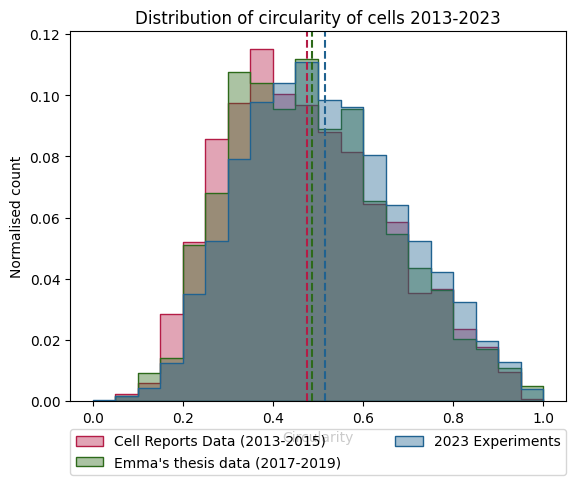

In [11]:
sns.histplot(data=olddata, x='Circularity_j', element="step", binrange=[0,1], bins=20, stat='probability', color=sns.husl_palette(3,l=.4)[0], alpha=0.4, label='Cell Reports Data (2013-2015)')
#sns.histplot(data=meddata, x='circularity', element="step", binrange=[0,1],bins=20, stat='probability', color=sns.husl_palette(3,l=.4)[1], alpha=0.4)
sns.histplot(data=emmadata, x='circularity', element="step", binrange=[0,1],bins=20, stat='probability', color=sns.husl_palette(3,l=.4)[1], alpha=0.4, label="Emma's thesis data (2017-2019)")
sns.histplot(data=newdata, x='circularity', element="step", binrange=[0,1],bins=20, stat='probability', color=sns.husl_palette(3,l=.4)[2], alpha=0.4, label='2023 Experiments')

plt.axvline(np.mean(olddata.Circularity_j), c=sns.husl_palette(3,l=.4)[0], linestyle='--')
#plt.axvline(np.mean(meddata.circularity), c=sns.husl_palette(3,l=.4)[1], linestyle='--')
plt.axvline(np.mean(emmadata.circularity), c=sns.husl_palette(3,l=.4)[1], linestyle='--')
plt.axvline(np.mean(newdata.circularity), c=sns.husl_palette(3,l=.4)[2], linestyle='--')

plt.ylabel("Normalised count")
plt.xlabel("Circularity")
plt.legend(bbox_to_anchor=(0, -.20, 1, 0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=2)
plt.title("Distribution of circularity of cells 2013-2023")
fig=plt.gcf()
plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\circularity_comparison.png', dpi=300, bbox_inches='tight')



In [168]:
#olddata.groupby('Experiment').describe().Circularity_j.to_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\circularity_summary_stats_cellreports.csv')

newdata.groupby('Exp').describe().circularity.to_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\circularity_summary_stats_new_dat.csv')

In [135]:
np.mean(newdata.circularity)

0.5145808974991246

In [171]:
meddata.circularity.describe()

count    3073.000000
mean        0.522542
std         0.170035
min         0.026785
25%         0.398468
50%         0.508952
75%         0.646582
max         0.988372
Name: circularity, dtype: float64

In [12]:
meddata

,cell_id,cell_perimeter_microns,cell_area_microns,shape_parameter,circularity,cell_edge_count,major_shape_axis_alignment_rads
0,0.0,37.949612,64.153671,4.738017,0.406253,3.0,3.097265
1,1.0,40.843517,79.046488,4.593903,0.665355,3.0,0.102698
2,2.0,37.305302,65.299273,4.616538,0.598345,3.0,2.962207
3,3.0,47.208778,108.832121,4.525267,0.304313,4.0,1.862007
4,4.0,65.937376,244.013071,4.221095,0.299982,4.0,3.055036
...,...,...,...,...,...,...,...
657,657.0,135.032345,1201.727223,3.895246,0.460663,9.0,0.239071
658,658.0,125.396232,1051.511320,3.867030,0.262441,9.0,2.976116
659,659.0,119.596399,1000.396186,3.781221,0.438939,9.0,0.251759
660,660.0,147.765799,1454.173393,3.874948,0.436713,9.0,1.112052


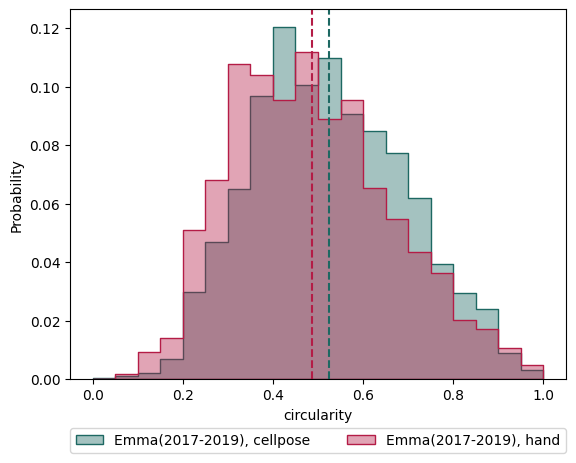

In [20]:
sns.histplot(data=meddata, x='circularity', element="step", binrange=[0,1],bins=20, stat='probability', color=sns.husl_palette(2,l=.4)[1], alpha=0.4,label="Emma(2017-2019), cellpose")
sns.histplot(data=emmadata, x='circularity', element="step", binrange=[0,1],bins=20, stat='probability', color=sns.husl_palette(2,l=.4)[0], alpha=0.4, label="Emma(2017-2019), hand")
plt.axvline(np.mean(meddata.circularity), c=sns.husl_palette(2,l=.4)[1], linestyle='--')
plt.axvline(np.mean(emmadata.circularity), c=sns.husl_palette(2,l=.4)[0], linestyle='--')

plt.legend(bbox_to_anchor=(0, -.20, 1, 0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=2)

plt.savefig('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\circularity_comparison_hand_CP.png', dpi=300, bbox_inches='tight')

In [157]:
pd.read_csv(emma_files[2]).describe().circularity.to_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\circularity_Emma2.csv')

In [158]:
emma_files

['C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20170628_1_EJ_GFPTub-CheHis_uf_8p6_MP_fr1\\2023-05-25_16-27-14\\Data\\20170628_1_fr1_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20190606_1_EJ_GFPTub-CheHis_uf_8p6_MP_fr1\\2023-05-25_16-58-30\\Data\\20190606_1_fr1_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Code\\tissue_image_analysis\\tissue_image_analysis\\Output\\20190613_1_EJ_GFPTub-CheHis_uf_8p6_MP_fr1\\2023-05-25_15-57-19\\Data\\20190613_1_fr1_cell_data_geometry.csv']

In [19]:
ttest_ind(meddata.circularity, emmadata.circularity)

TtestResult(statistic=6.4990579179105, pvalue=9.148751477241049e-11, df=3740.0)

In [83]:
new_files

['C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\20230803_2_IP_GFPCAAX-CHeHis_uf_8p6.lif\\20230803_2_IP_GFPCAAX-CHeHis_m3c3_uf_8p6_MP_cp_outlines\\2023-10-31_11-51-29\\Data\\20230803_2_MP_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\20230810_2_IP_GFPCAAX-CheHis_uf_8p6.lif\\20230810_2_IP_GFPCAAX-CheHis_m4c1_uf_8p6_MP_cp_outlines\\2023-10-31_11-58-46\\Data\\20230810_2_MP_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\20230811_1_GFPCAAX-CheHis_uf_8p6.lif\\20230811_1_GFPCAAX-CheHis_m1c1_uf_8p6_MP_cp_outlines\\2023-10-31_17-22-30\\Data\\20230811_1_cp_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\20230816_1_IP_GFPCAAX-CheHis_uf_8p6.lif\\20230816_1_IP_GFPCAAX-CheHis_m1c2_uf_8p6_MP_cp_outlines\\2023-10-31_17-39-42\\Data\\20230816_1_MP_cell_data_geometry.csv',
 'C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Iona_data\\20230816_2_IP_GFPCAAX-CheHis_m3c1_uf_8p6_MP_cp_outlines\\20230816_2_IP